# Floating Point Numbers

In [1]:
import numpy as np

In [2]:
x = 0.1 + 0.2
y = (x - 0.3) * 1e17
print(y)

5.551115123125783


In [3]:
# Zahl in scientific notation

np.format_float_scientific(1372.4828459e-4, precision=4 )

'1.3725e-01'

In [4]:
# Maschinengenauigkeit Epsilon
eps = np.finfo(np.float64).eps
print(eps)

2.220446049250313e-16


In [5]:
x = 2
print(f"Nächst mögliche Zahl von {x} ist {np.spacing(x)} entfernt")

Nächst mögliche Zahl von 2 ist 4.440892098500626e-16 entfernt


In [6]:
# Rundungsfehler
(1/3)**3 - 1/27 # Erwartet 0
# Rundungsfehler aufgrund verschiedener Darstellungsformen

-6.938893903907228e-18

In [7]:
# Absorbtion
x = 1e16
y = 1
z = x + y
print(z)

1e+16


In [8]:
# Overflow
x = 1e308
y = 1e308
z = x * y
print(z)

inf


# Aufgabe 3.4

In [9]:
n = int( input( 'Bitte eine natuerliche Zahl eingeben:' ))
nstellen = int( np.floor( np.log10( n )) + 1 )
quersum = 0
for i in range( nstellen ):
    letztestelle = n % 10
    quersum = quersum + letztestelle
    n = ( n - letztestelle ) / 10
print( 'Quersumme:', int( quersum ))

Quersumme: 18


Text(0, 0.5, '%')

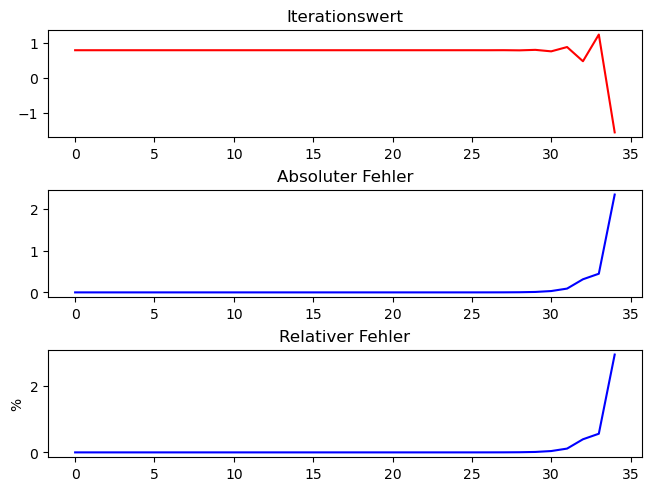

In [10]:
from matplotlib import pyplot as plt

wahr = 4/5
it = wahr * 5 * (1 - wahr)
n = 35
versuch = [0]*n
wert = [0]*n
absfehler = [0]*n
relfehler = [0]*n
for i in range( n ):
    versuch[i] = i
    wert[i] = it
    absfehler[i] = abs(wahr-it)
    relfehler[i] = abs(wahr-it) / wahr
    it = it * 5 * (1 - it)
fig, axs = plt.subplots(3, 1, constrained_layout=True)
axs[0].plot( versuch, wert, color='red' )
axs[0].set_title( 'Iterationswert' )
axs[1].plot( versuch, absfehler, color='blue' )
axs[1].set_title( 'Absoluter Fehler' )
axs[2].plot( versuch, relfehler, color='blue' )
axs[2].set_title( 'Relativer Fehler' )
axs[2].set_ylabel( '%' )

# Aufgabe 4

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def funktion(x):
    return x ** 2 * np.sin(x)

In [13]:
def ableitung(x):
    return 2*x * np.sin(x) + x**2 * np.cos(x)

In [14]:
def stammfunktion(x):
    return -x ** 2 * np.cos(x) + 2 * x * np.sin(x) + 2 * np.cos(x)

In [15]:
def trapezregel(a, b, h):
    x = np.arange(a, b + h, h)
    y = funktion(x)
    t = h / 2 * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])
    return t

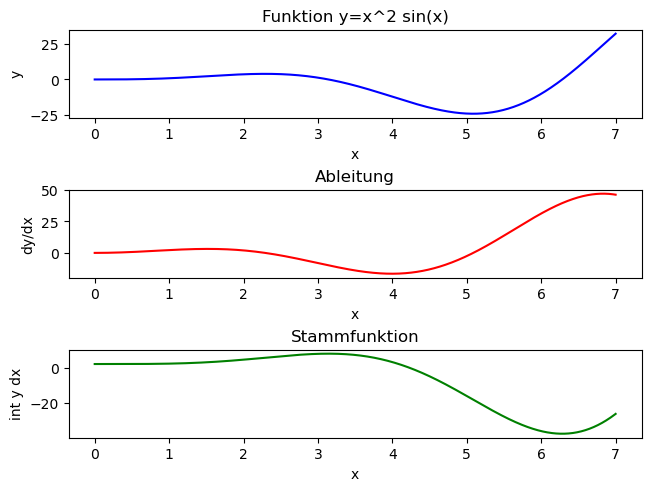

Wert des bestimmten Integrals = -28.235593572072272
h= 0.5
h= 0.1
h= 0.05
h= 0.01
h= 0.005
h= 0.001
h= 0.0005
h= 0.0001
h= 5e-05
h= 1e-05
h= 5e-06
h= 1e-06
h= 5e-07
h= 1e-07
h= 5e-08
h= 1e-08
h= 5e-09


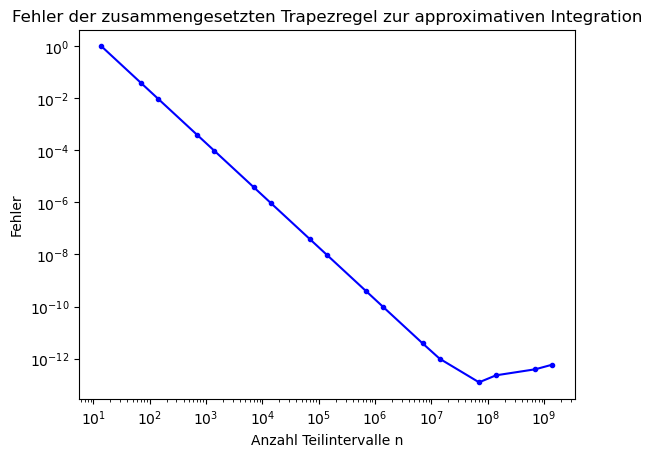

In [16]:
# Plot 1: definiere Intervall und werte Funktion, Ableitung, Stammfkt aus
a = 0
b = 7
x = np.linspace(a, b, 1000)
y = funktion(x)
ystrich = ableitung(x)
ystammfkt = stammfunktion(x)

# Visualisiere die drei Auswertungen untereinander
# Plotte die Funktion
fig, axs = plt.subplots(3, 1, constrained_layout=True)
axs[0].plot(x, y, color='blue')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Funktion y=x^2 sin(x)')

# Plotte die Ableitung
axs[1].plot(x, ystrich, color='red')
axs[1].set_xlabel('x')
axs[1].set_ylabel('dy/dx')
axs[1].set_title('Ableitung')

# Plotte die Stammfunktion, (Integrationskonstante := 0)
axs[2].plot(x, ystammfkt, color='green')
axs[2].set_xlabel('x')
axs[2].set_ylabel('int y dx')
axs[2].set_title('Stammfunktion')
plt.show()

# exakte und approximative Berechnung eines bestimmten Integrals
intexakt = stammfunktion(b) - stammfunktion(a)
print('Wert des bestimmten Integrals =', intexakt)

h = np.array([5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4, 5e-5,
              1e-5, 5e-6, 1e-6, 5e-7, 1e-7, 5e-8, 1e-8, 5e-9])
m = len(h)
ns = (b - a) / h
fehler = [0] * m
for i in range(m):
    print("h=", h[i])
    inttrapezapprox = trapezregel(a, b, h[i])
    fehler[i] = abs(intexakt - inttrapezapprox)

plt.figure(4)
#Doppelt-logarithmische Skala
plt.title('Fehler der zusammengesetzten Trapezregel zur approximativen Integration')
plt.xlabel('Anzahl Teilintervalle n')
plt.ylabel('Fehler')
plt.loglog(ns, fehler, color='blue', marker='.')
plt.show()
